In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [20]:
img = cv.imread('Images/Echantillion1Mod2_301.png', cv.IMREAD_GRAYSCALE)
img_RGB = cv.imread('Images/Echantillion1Mod2_301.png', cv.IMREAD_COLOR)

In [9]:
def show_image(img, title, cmap='gray'):
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.title(title)
    plt.show()

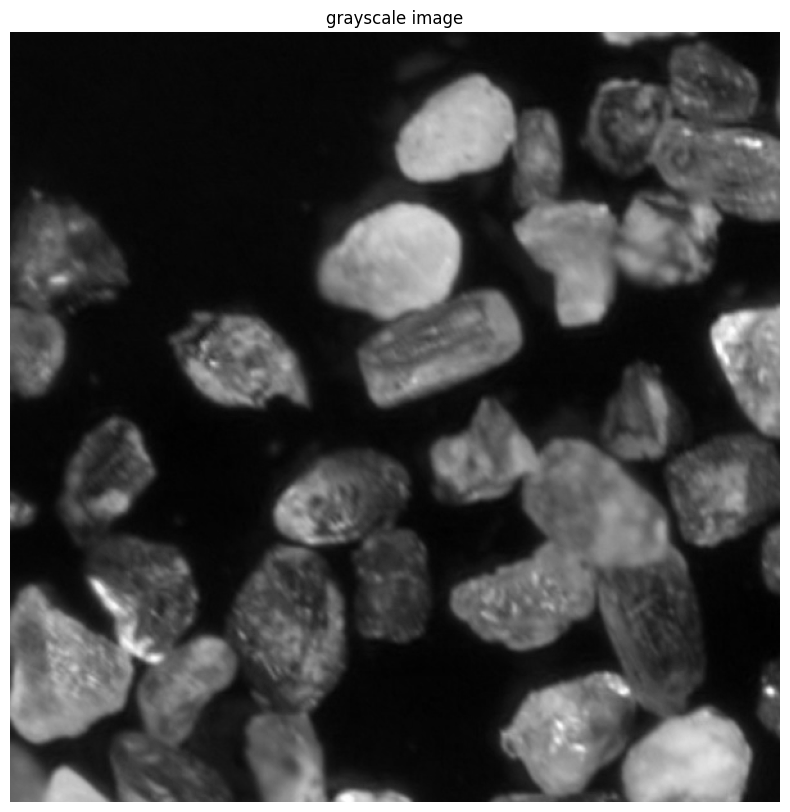

In [10]:
show_image(img, 'grayscale image')

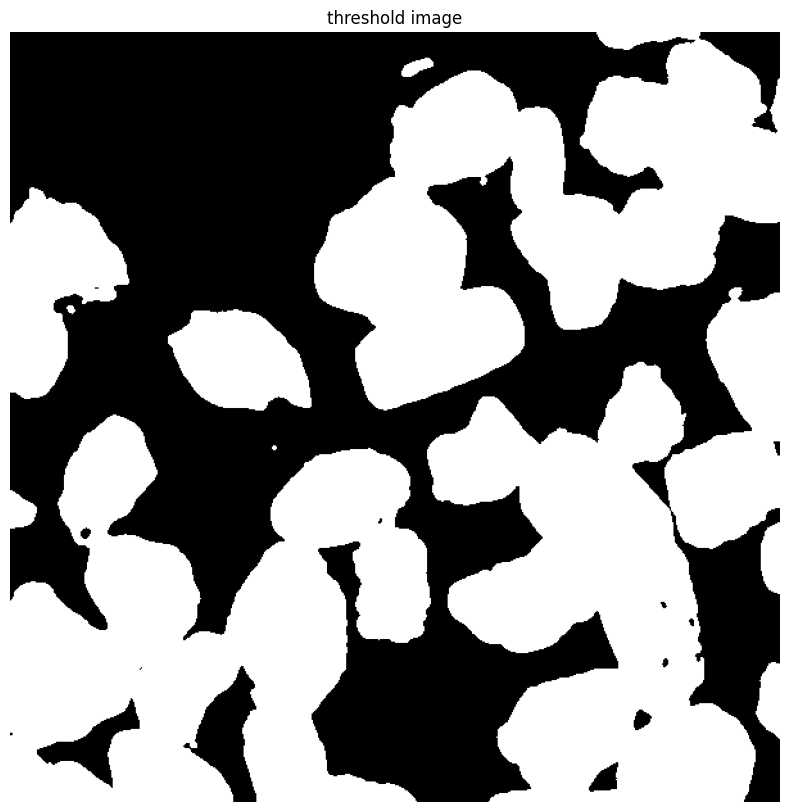

In [18]:
blur_img = cv.GaussianBlur(img, (5,5), 0)
thresh_img = cv.threshold(blur_img, 40, 255, cv.THRESH_BINARY)[1]
show_image(thresh_img, 'threshold image')

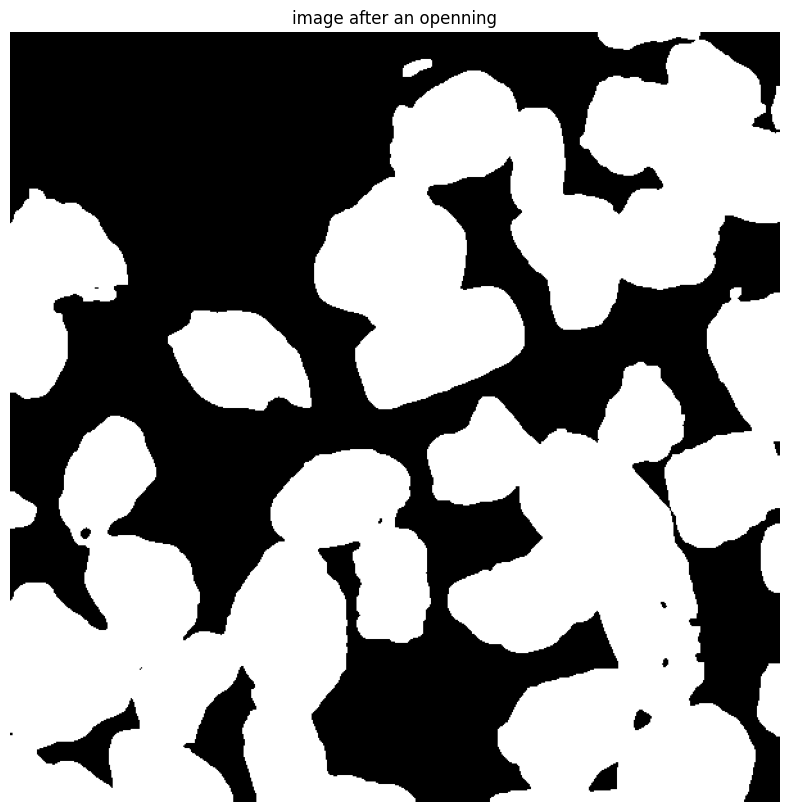

In [19]:
open_img = cv.morphologyEx(thresh_img, cv.MORPH_OPEN, np.ones((5,5)))
show_image(open_img, 'image after an openning') 

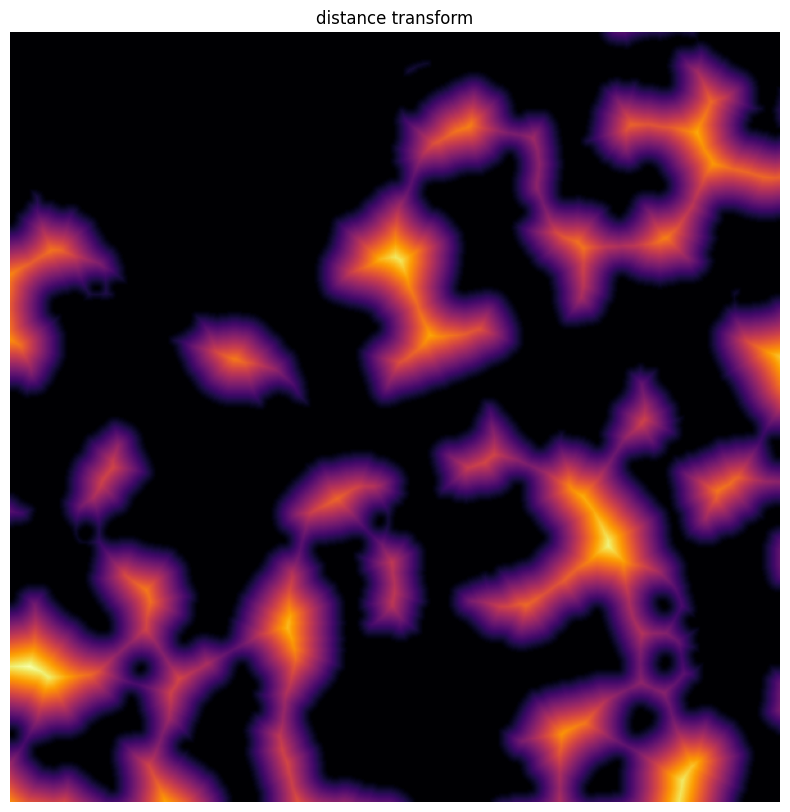

In [22]:
dist_transform = cv.distanceTransform(open_img, cv.DIST_L2, 5)
show_image(dist_transform, 'distance transform', cmap='inferno')

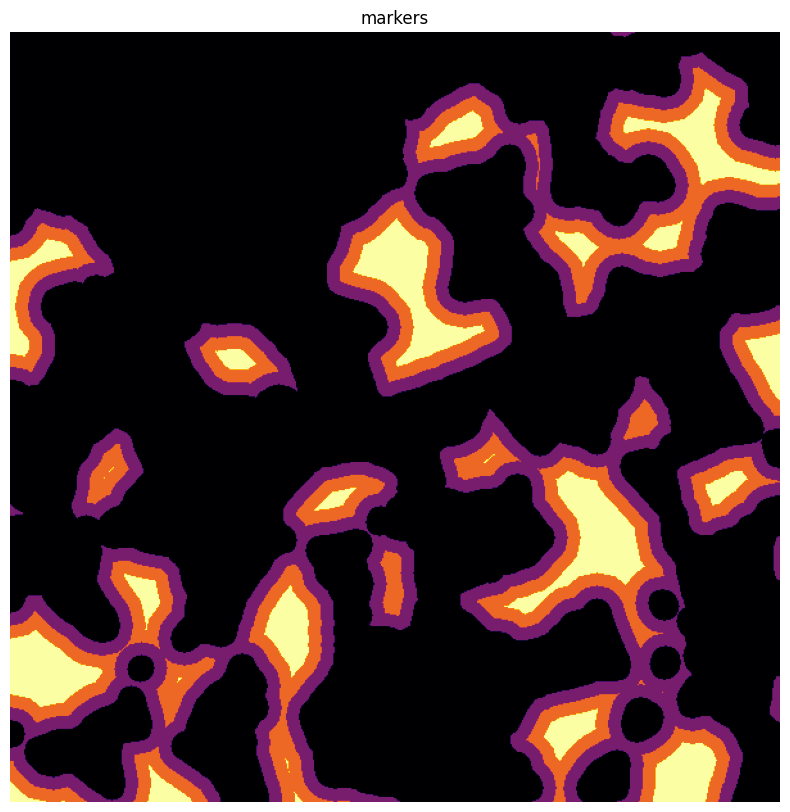

In [64]:
dist_thresh = cv.adaptiveThreshold(np.uint8(dist_transform), 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 5, 0)
dist_thresh = np.uint8(dist_thresh)
markers = cv.connectedComponents(dist_thresh)[1]
show_image(markers, 'markers', cmap='magma')

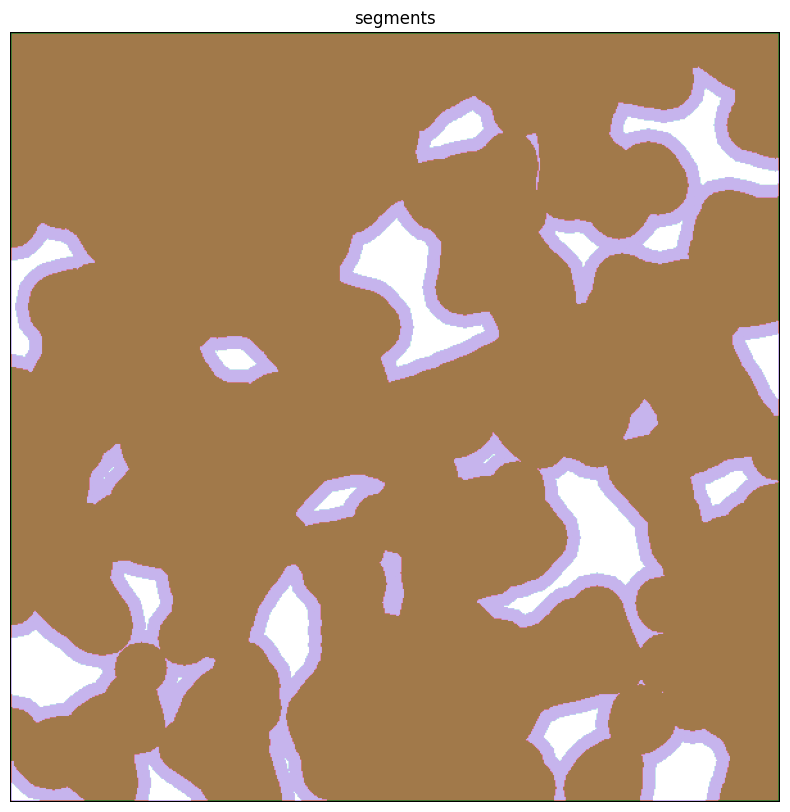

In [65]:
markers = np.int32(markers + 1)
segments = cv.watershed(img_RGB, markers)
show_image(segments, 'segments', cmap='cubehelix')